In [1]:
import numpy as np
import matplotlib.pyplot as plt

import os
import sys

module_path = os.path.abspath(os.path.join('..'))

if module_path not in sys.path :
    sys.path.append(module_path)

    
import _ressources.chain as chain
import _ressources.tools as tools
import _ressources.lumenclass as lc
import _ressources.configreader as configreader
import _ressources.analysis_tools.analysis as an

#main_dir = '/Users/mathieuleverge/git/chain_lumen/_data/hydrosmotic_hydraulic/versus/N1000_hydraulic/'
main_dir = '/Users/mathieuleverge/git/chain_lumen/_data/'

mu = (np.sin(np.pi/3.))**2 / (2*np.pi/3. - np.sin(2*np.pi/3.))
nu = np.pi/3. / np.sin(np.pi/3.)


Import successful !


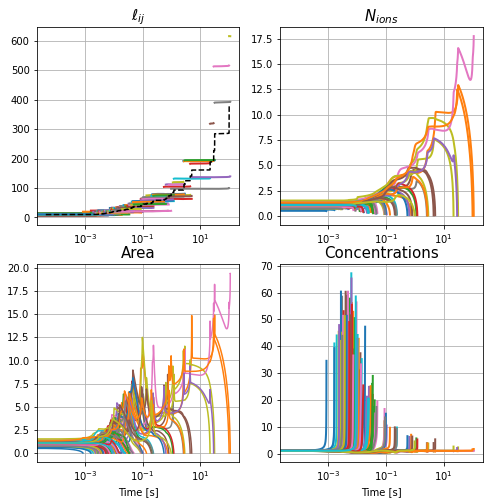

In [55]:
path = os.path.join(main_dir, 'tests_1')

L, nions, pos = tools.load_file(os.path.join(path, 'sim_all.dat'), hydroosmotic=True)
ell = tools.load_brfile(os.path.join(path, 'sim_bridges.dat'))

savename = os.path.join(main_dir, 'tests_equilibrium/graphs.eps')

show_area=0
savefig=0
x_log=True
y_log=False

tools.plot_evolution(L, nions, ell, savename=savename, show_totalarea=show_area, savefig=savefig, x_logscale=x_log, y_logscale=y_log, figsize=(8, 8))




Import successful !


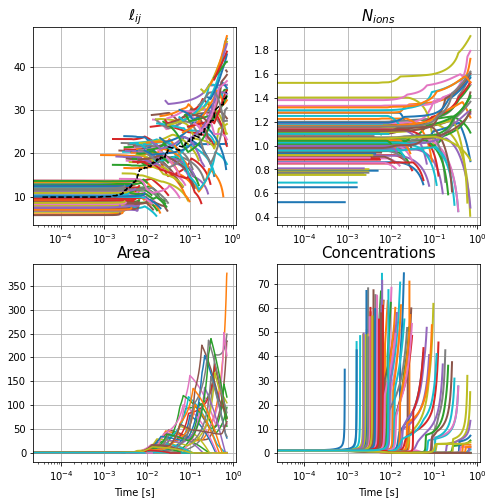

In [61]:
path = os.path.join(main_dir, 'tests_2')

L, nions, pos = tools.load_file(os.path.join(path, 'sim_all.dat'), hydroosmotic=True)
ell = tools.load_brfile(os.path.join(path, 'sim_bridges.dat'))

savename = os.path.join(main_dir, 'tests_equilibrium/graphs.eps')

show_area=0
savefig=0
x_log=True
y_log=False

tools.plot_evolution(L, nions, ell, savename=savename, show_totalarea=show_area, savefig=savefig, x_logscale=x_log, y_logscale=y_log, figsize=(8, 8))





In [77]:
np.nanargmax(L[:, 1:], axis=0)

array([    0,  2234,  4141,   893,     0, 20217,   281,     0,  3061,
           0,  1034, 20299,   862,     0,  4019,  1892,     9, 20299,
           0,  2744,     0,   951, 16030,     0,   514,     0,  7565,
           0,   327,     0,  7565,    51, 10110,     0,  1197,     0,
       18569,     0,  5220,     0,  1137,    52, 18569,     0,   484,
           0,  5873,   173,     0,  7063,     0,   956,     0, 16094,
           0,     0,  2111,     0, 16094,   104,     0,  8989,     0,
        1075,     0, 11090,     0,  3116,     0,   230, 12122,     0,
        2196,     0, 12122,     0,   972, 14599,     0,  3860,     0,
         544, 14599,     0,   774,  2333,     0, 13517,     0,   451,
           0,  8369,    13,  1827,     0, 20299,   343,     0,  2224,
          13])

In [ ]:
L[]

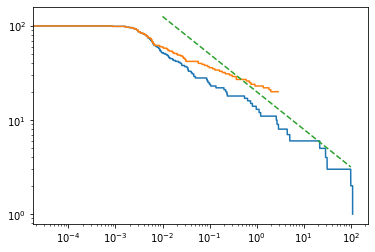

In [78]:
Nt1 = np.loadtxt(os.path.join(main_dir, 'tests_1', 'sim_nlum.dat'))
Nt2 = np.loadtxt(os.path.join(main_dir, 'tests_2', 'sim_nlum.dat'))
#Nt3 = np.loadtxt(os.path.join(main_dir, 'sim_nlum3.dat'))
plt.xscale('log')
plt.yscale('log')
plt.plot(Nt1[:, 0], Nt1[:, 1])
plt.plot(Nt2[:, 0], Nt2[:, 1])
#plt.plot(Nt3[:, 0], Nt3[:, 1])

k, a = 20., -2./5
t = np.logspace(-2, 2)
plt.plot(t, k*t**a, linestyle='--')

Import successful !


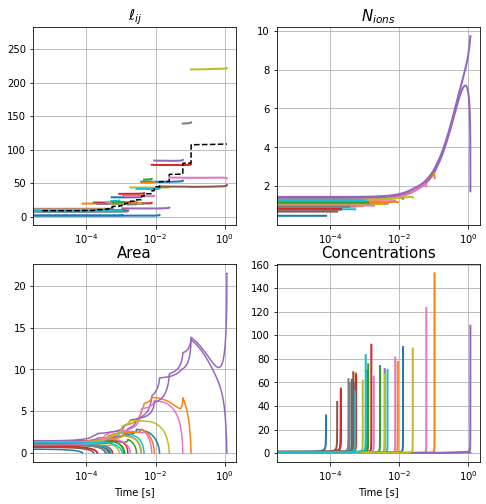

In [21]:
path = os.path.join(main_dir, 'tests')

L, nions, pos = tools.load_file(os.path.join(path, 'sim_all.dat'), hydroosmotic=True)
ell = tools.load_brfile(os.path.join(path, 'sim_bridges.dat'))

savename = os.path.join(main_dir, 'tests_equilibrium/graphs.eps')

show_area=0
savefig=0
x_log=True
y_log=False

tools.plot_evolution(L, nions, ell, savename=savename, show_totalarea=show_area, savefig=savefig, x_logscale=x_log, y_logscale=y_log, figsize=(8, 8))





In [12]:
def import_pumping_params(folder) :
    params = []
    f = open(os.path.join(folder, 'config.conf.tpl'), 'r').readlines()
    for line in f :
        if line.startswith('param') :
            splitted_line = line.split(' ')
            params += [float(splitted_line[2])]
            
    return params

In [6]:
L_n, nion_n, pos_n = tools.load_file(os.path.join(path_n, 'sim_all.dat'), hydroosmotic=True)
ell_n = tools.load_brfile(os.path.join(path_n, 'sim_bridges.dat'))

show_area=0
savefig=False
x_log = 1
y_log = 0
tools.plot_evolution(L_n, nion_n, ell_n, savename='', show_totalarea=show_area, savefig=savefig, x_logscale=x_log, y_logscale=y_log, figsize=(7, 7))



OSError: /Users/mathieuleverge/git/chain_lumen/_data/tests/sim_all.dat not found.

In [1]:
def h(z, C=-4, zmax=2.) :
        return (3+C/(z**2))/(C*(1/z - 1.) - z)
    
def calc_fz(z, dz, z0=1e-6) :    
    sol = [z0]
    for i in range(1, len(z)) :
        sol += [sol[i-1] + dz*h(z[i-1])*sol[i-1]]
    
    Z = np.sum(sol)
    sol = np.array(sol) / Z
    return sol

z = np.linspace(1e-3, 1.99, 1000)
dz = z[1]-z[0]
sol = calc_fz(z, dz)

plt.plot(z, sol, color='k')
plt.grid()
plt.xlabel(r'$\lambda$', fontsize=15)
plt.ylabel(r'$f(\lambda)$', fontsize=15)
#plt.savefig('/Users/mathieuleverge/Dropbox/M.Leverge/Lumen/Hydro-osmotic coarsening/Theory/figures/chap_hydraulic/self_similar_distribution.eps', format='eps')
plt.show()

NameError: name 'np' is not defined

In [13]:
gamma = 1./np.sum(sol*z)

In [14]:
def find_tstep(time_list, t0) :
    return np.argmin(np.abs(time_list - t0))

def calc_avg_distrib(X_dict, Y_dict) :
    X_array = np.array([X_dict[k] for k in X_dict.keys()])
    X_avg = np.average(X_array, axis=0)

    Y_array = np.array([Y_dict[k] for k in Y_dict.keys()])
    Y_avg = np.average(Y_array, axis=0)
    return X_avg, Y_avg


def make_T_dict(folder, npts, nsim=20, log_tmin=-3, log_tmax=7) :
    time_plot_list = np.logspace(log_tmin, log_tmax, npts)
    T_dict = {}
    #for k in [30] :
    for k in range(nsim) :
        k+=20
        T_dict[k] = np.loadtxt(os.path.join(folder, 'run'+str(k).zfill(4)+'/distrib_length.dat'), usecols=0)
    return T_dict, time_plot_list

def make_step_dict(T_dict, time_plot_list, npts, nsim) :
    step_dict = {}
    for n in range(npts) :
        step_dict[n] = {}
        for k in range(nsim) :
        #for k in [30] :
            k+=20
            step_dict[n][k] = np.argmin(np.abs(T_dict[k] - time_plot_list[n]))
    return step_dict

def calc_distrib(time, folder) :
    dat = {}
    for elem in os.listdir(folder) :
        if elem.startswith('run'):
            print(elem, ' imported', end='\r')
            tdat = np.loadtxt(os.path.join(folder, elem, 'sim_nlum.dat'), usecols=0)
            step = np.argmin(np.abs(tdat-time))
            Ldat = np.genfromtxt(os.path.join(folder, elem, 'distrib_length.dat'), skip_header=step, skip_footer=len(tdat)-step-1)
            dat[int(elem[-4:])] = [step, Ldat]
    
    new_L = np.concatenate([dat[k][1][1:] for k in dat.keys()])
    #print(len(new_L))
    bins = np.max([10, 10+int(np.log10(len(new_L)))*10])
    #print(bins)
    
    y, x = np.histogram(new_L, bins=bins, weights=np.ones_like(new_L)/len(new_L))
    x = 0.5*(x[1:]+x[:-1])
    distrib = [x, y]
    return distrib



In [15]:
dirname = '/Users/mathieuleverge/git/chain_lumen/_data/osmotic/N1000/ell10/chiv500_chis5/'

In [16]:
t = 5e-3

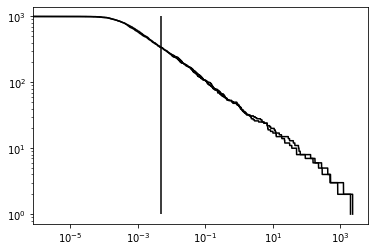

In [17]:

for i in range(2) :
    Nt = np.loadtxt(os.path.join(dirname, 'run'+str(i).zfill(4), 'sim_nlum.dat'))
    plt.plot(Nt[:, 0], Nt[:, 1], color='k')
    
plt.vlines(x=t, ymin=1, ymax=1e3)

plt.xscale('log')
plt.yscale('log')

In [18]:
distrib = calc_distrib(time=t, folder=dirname)

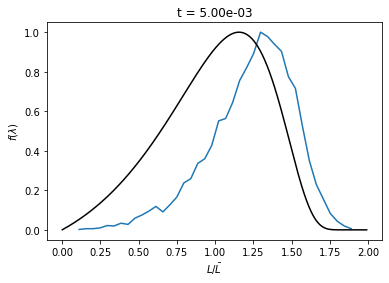

In [19]:
plt.plot(distrib[0]/(gamma*np.average(distrib[0])), distrib[1]/np.max(distrib[1]))
plt.plot(z, np.array(sol)/np.max(sol), color='k')

plt.xlabel(r'$L/\bar{L}$')
plt.ylabel(r'$f(\lambda)$')
plt.title('t = '+"{:2.2e}".format(t))
plt.show()


In [5]:
def gaussian_profile(x, amp, mu, sigma, threshold) :
    return amp*np.exp(-(x-mu)**2/sigma**2) + threshold

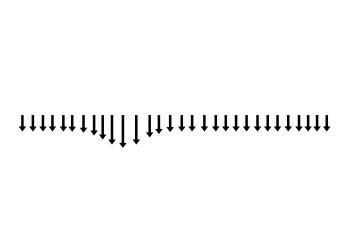

In [6]:
amp, mu, sigma, threshold = 1.0, 0.4, 0.05, 1.
X = np.array([ch_n.lumens_dict[k].pos for k in ch_n.lumens_dict.keys() if k != 0 and k !=-1])
Y = np.zeros(len(X))

U, V = np.zeros(len(X)), -gaussian_profile(X/ch_n.total_length, amp, mu, sigma, threshold)
fig, ax = plt.subplots()
ax.quiver(X, Y, U, V, headwidth=3, headlength=2, headaxislength=2)
ax.axis('off')
#plt.savefig(os.path.join(path_n, 'arrows_pumping.eps'), format='eps')
plt.show()

#tools.plot_profile(x, ch_n, savefig=True, savename=os.path.join(path_n, 'pic.eps'), picformat='eps', centers=False)


22.916648430518904
25.29513779957094
27.579781893880646
29.73712007877585
32.217759773899544
34.22776763739565
36.79595783396327
39.19766222075156
41.152592789274664
43.259201798663995
45.74192634180282
48.77930793357575
51.82315858854537
53.92107231266597
56.47841735435747
59.11376487956967
61.45713910645176
64.24944732900497
66.83967044223307
69.1089877736675
71.44394226705492
73.83707044298501
76.3189884475568
78.63497978589523
80.86201250664607
83.29036094027737
85.74343105463717
87.81490966434532
89.84398338587579
92.05065250190594


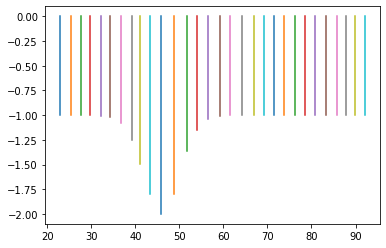

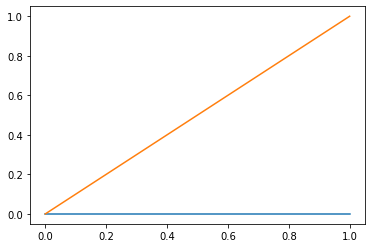

In [20]:
plt.plot()
#plt.plot((0., 1.), (1., 1.))

Import successful !


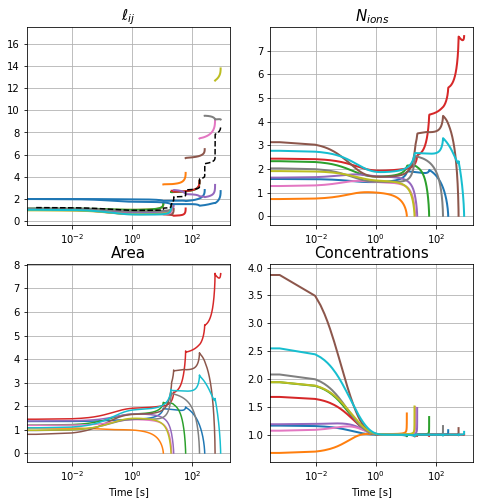

In [25]:
path = os.path.join(main_dir, 'tests')

L, nions, pos = tools.load_file(os.path.join(path, 'sim_all.dat'), hydroosmotic=True)
ell = tools.load_brfile(os.path.join(path, 'sim_bridges.dat'))

savename = os.path.join(main_dir, 'tests/graphs.eps')

show_area=0
savefig=1
x_log=True
y_log=False

tools.plot_evolution(L, nions, ell, savename=savename, show_totalarea=show_area, savefig=savefig, x_logscale=x_log, y_logscale=y_log, figsize=(8, 8))




Import successful !


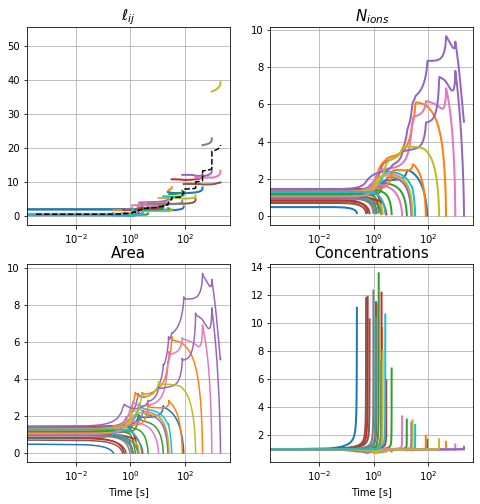

In [27]:
path = os.path.join(main_dir, 'tests_equilibrium')

L, nions, pos = tools.load_file(os.path.join(path, 'sim_all.dat'), hydroosmotic=True)
ell = tools.load_brfile(os.path.join(path, 'sim_bridges.dat'))

savename = os.path.join(main_dir, 'tests_equilibrium/graphs.eps')

show_area=0
savefig=1
x_log=True
y_log=False

tools.plot_evolution(L, nions, ell, savename=savename, show_totalarea=show_area, savefig=savefig, x_logscale=x_log, y_logscale=y_log, figsize=(8, 8))



In [22]:
def beta(d) :
    return 1./(2+1./d)

def upperbound(n) :
    return n*(n-1)/(3*(n-1)+2)


In [23]:
d = np.arange(1, 5)
b = beta(d)
b_up = upperbound(d)

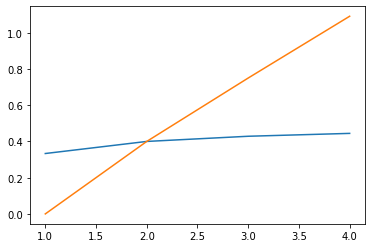

In [24]:
#plt.xscale('log')
plt.plot(d, b)
plt.plot(d, b_up)

In [20]:
b

array([0.33333333, 0.4       , 0.42857143, 0.44444444])

In [2]:
dirname = 'osmotic/N1000/ell10/chiv500_chis1_taus100/'
Nt = {}
for i in range(20) :
    Nt[i] = np.loadtxt(os.path.join(main_dir, dirname, 'sim_nlum'+str(i).zfill(4)+'_bis.dat'))
    print(i, ' done !', end='\r')
    

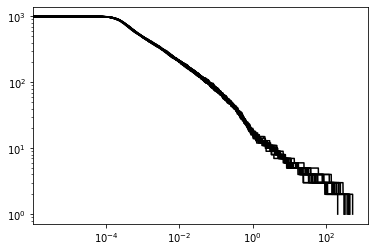

In [3]:

for i in range(20) :
    plt.plot(Nt[i][:, 0], Nt[i][:, 1], color='k')

plt.xscale('log')
plt.yscale('log')



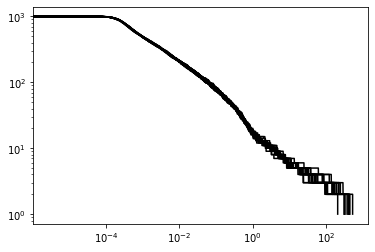

In [7]:

for i in range(20) :
    plt.plot(Nt[i][:, 0], Nt[i][:, 1], color='k')

plt.xscale('log')
plt.yscale('log')


In [24]:
for i in range(20) :
    np.savetxt(str(os.path.join(main_dir, dirname, 'sim_nlum'+str(i).zfill(4)+'_bis.dat')), Nt[i][:np.argmin(Nt[i][:, 1])+1])
    

In [4]:
def gen_log_times(tmin, tmax, npts) :
    return np.logspace(np.log10(tmin), np.log10(tmax), npts)

def find_argmins(Nt, log_times) :
    index_array = np.zeros(len(log_times), dtype=int)
    for k in range(len(log_times)) :
        index_array[k] = np.argmin(np.abs(log_times[k]-Nt[:, 0]))
    return index_array

def gen_index_array(Nt, npts) :
    size = len(Nt)
    
    tmin = np.min(Nt[1:, 0])   # skip the first time since t=0
    tmax = np.max(Nt[1:, 0])   # skip the first time since t=0
    
    log_times = gen_log_times(tmin, tmax, npts)
    index_array = find_argmins(Nt, log_times)
    
    return index_array

def plot_conf(chis, chiv, Nt, wmin=-6, wmax=3, rescaled=False, ell0=10, L0=1, tau=1, show_sim=False, ax=None) :
    xiv = ell0*chiv
    T = (2*tau*L0*ell0)/((xiv**2)*mu*eps)
    if show_sim :
        for n in range(nsim) :
            index_array = gen_index_array(Nt[(chis, chiv)][n], npts)
            if rescaled :
                if ax != None :
                    ax.plot(Nt[(chis, chiv)][n][index_array, 0]/T, Nt[(chis, chiv)][n][index_array, 1], color = plot_param_list[(chis, chiv)][0], alpha = 0.1)
                else :
                    plt.plot(Nt[(chis, chiv)][n][index_array, 0]/T, Nt[(chis, chiv)][n][index_array, 1], color = plot_param_list[(chis, chiv)][0], alpha = 0.1)
            else :
                if ax != None :
                    ax.plot(Nt[(chis, chiv)][n][index_array, 0]/T, Nt[(chis, chiv)][n][index_array, 1], color = plot_param_list[(chis, chiv)][0], alpha = 0.1)
                else :
                    plt.plot(Nt[(chis, chiv)][n][index_array, 0], Nt[(chis, chiv)][n][index_array, 1], color = plot_param_list[(chis, chiv)][0], alpha = 0.1)

    res_avg, res_std = an.batch(data_dict=Nt[(chis, chiv)], wmin=wmin, wmax=wmax, nwindow=npts)
    if rescaled :
        if ax != None :
            ax.plot(res_avg[:, 0]/T, res_avg[:, 1], marker=plot_param_list[(chis, chiv)][1], color = plot_param_list[(chis, chiv)][0], markersize=plot_param_list[(chis, chiv)][2], linewidth=plot_param_list[(chis, chiv)][3], linestyle=plot_param_list[(chis, chiv)][5], label = r'$\chi_v = '+str(chiv)+' ; \chi_s = '+str(chis)+'$')
        else :
            plt.plot(res_avg[:, 0]/T, res_avg[:, 1], marker=plot_param_list[(chis, chiv)][1], color = plot_param_list[(chis, chiv)][0], markersize=plot_param_list[(chis, chiv)][2], linewidth=plot_param_list[(chis, chiv)][3], linestyle=plot_param_list[(chis, chiv)][5], label = r'$\chi_v = '+str(chiv)+' ; \chi_s = '+str(chis)+'$')
    else :
        if ax != None :
            ax.plot(res_avg[:, 0], res_avg[:, 1], marker=plot_param_list[(chis, chiv)][1], color = plot_param_list[(chis, chiv)][0], markersize=plot_param_list[(chis, chiv)][2], linewidth=plot_param_list[(chis, chiv)][3], linestyle=plot_param_list[(chis, chiv)][5], label = r'$\chi_v = '+str(chiv)+' ; \chi_s = '+str(chis)+'$')
        else :
            plt.plot(res_avg[:, 0], res_avg[:, 1], marker=plot_param_list[(chis, chiv)][1], color = plot_param_list[(chis, chiv)][0], markersize=plot_param_list[(chis, chiv)][2], linewidth=plot_param_list[(chis, chiv)][3], linestyle=plot_param_list[(chis, chiv)][5], label = r'$\chi_v = '+str(chiv)+' ; \chi_s = '+str(chis)+'$')
    
    #N0=1000      
    #Tf = T*N0**(5./2)
    #plt.vlines(x=1/Tf, ymin=1., ymax=N0, linestyle = '--', color=plot_param_list[(chis, chiv)][0])



In [6]:
gen_index_array(Nt, npts=60)

TypeError: unhashable type: 'slice'

In [12]:
res_avg, res_std = an.batch(data_dict=Nt, wmin=-5, wmax=3, nwindow=50)

End of import !


/usr/local/lib/python3.8/site-packages/numpy/lib/function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/usr/local/lib/python3.8/site-packages/numpy/core/_methods.py:162: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(
/usr/local/lib/python3.8/site-packages/numpy/core/_methods.py:233: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/usr/local/lib/python3.8/site-packages/numpy/core/_methods.py:194: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(
/usr/local/lib/python3.8/site-packages/numpy/core/_methods.py:223: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(
/Users/mathieuleverge/git/chain_lumen/_ressources/analysis_tools/analysis.py:147: RuntimeWarning: Mean of empty slice
  tavg = np.nanmean([Lavg[j][0] for j in range(len(Lavg))])
/Users/mathieuleverge/git/chain_lumen/_ressources/analysis_tools/ana

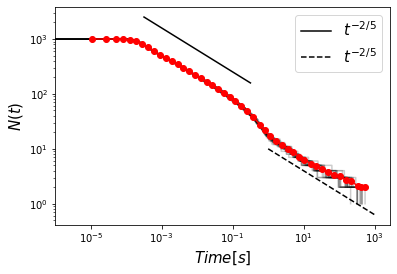

In [25]:

plt.xscale('log')
plt.yscale('log')
for i in range(20) :
    plt.plot(Nt[i][:, 0], Nt[i][:, 1], color='k', alpha=0.2)
plt.plot(res_avg[:, 0], res_avg[:, 1], marker='o', color='red')

t1 = np.logspace(-3.5, -0.5, 101)
k1, a1 = 100, -2/5.
plt.plot(t1, k1*t1**a1, label=r'$t^{-2/5}$', color='k')

t2 = np.logspace(0, 3, 101)
k2, a2 = 10, -2/5.
plt.plot(t2, k2*t2**a2, label=r'$t^{-2/5}$', color='k', linestyle='--')

plt.xlabel(r'$Time [s]$', fontsize=15)
plt.ylabel(r'$N(t)$', fontsize=15)

plt.legend(fontsize=15)
plt.show()
